In [ ]:
import ROOT
import uproot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
file_name1 = "mcv6.4.gsg_anumu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.merged_9635_10005_inline.root"
f  = ROOT.TFile(file_name1)
i = uproot.open(file_name1)
fi1 = i['E']

9635 9635 10286 10005


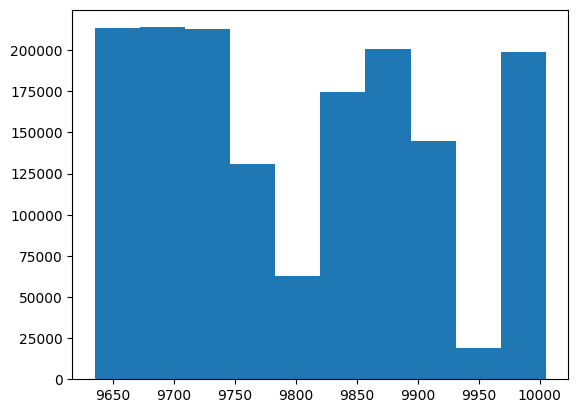

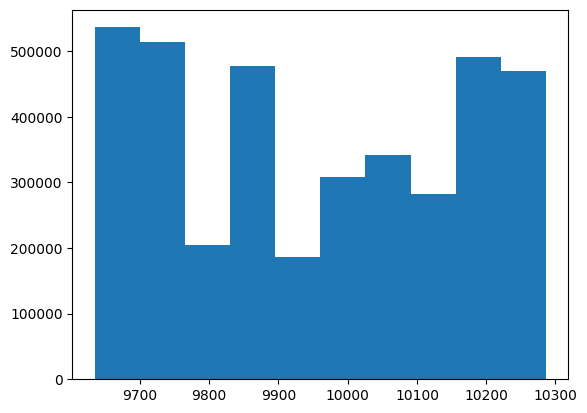

In [28]:
k = (fi1['run_id'].arrays(library = 'pd')['run_id'].to_numpy()) 
m = (fi3['pseudo_runid'].arrays(library = 'pd')['pseudo_runid'].to_numpy())
print(min(m), min(k), max(m), max(k))
a = plt.hist(k)
plt.show()
b = plt.hist(m)

/tmp/ipykernel_7553/714578895.py:22: RuntimeWarning: divide by zero encountered in log10
  all = all.loc[(all['run_id'] == run) & (all['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5)] # & (all['trks.dir.z'].to_numpy()[:, 0] > 0)]


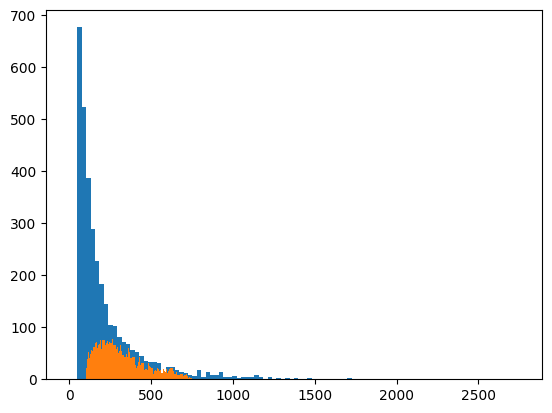

In [3]:
def cuts_for_fi1(fi, run):
    list_ret = []
    run_ids = fi['run_id'].arrays(library = 'pd')
    #zenith = fi['zenith'].arrays(library = 'pd')
    mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
    ids = fi['id'].arrays(library = 'pd')
    lkld = fi['trks.lik']
    df = lkld.arrays(library = 'pd')
    #cos zenith = trackfit.dir.z
    trks_z = fi['trks.dir.z'].arrays(library = 'pd')
   
    #Slength = trackfit.len or trks.len

    fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
    # logbeta0 = betazero/angular resolution???

    #lik_run = pd.concat([df, run_ids], axis=1, join='inner')
    all = pd.concat([df, run_ids, ids, trks_z, fitinf], axis = 1, join = 'inner') 
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 else None )))

    all = all.loc[(all['run_id'] == run) & (all['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5)] # & (all['trks.dir.z'].to_numpy()[:, 0] > 0)]
    
    #temp = lik_run.loc[(lik_run['run_id'] == run) & (lik_run['trks.lik'].to_numpy()[:, 0] > 50)]
    l2 = np.array((all['trks.lik'].tolist()))[:,0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 else None )))
    list_ret += [plt.hist(Slen, 100)]
    list_ret += [plt.hist(np.log10(beta0), 100)]
    l2 = - all['trks.dir.z'].to_numpy()[:, 0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    #plt.show()
    #return len(l2), plt1
    return len(l2), list_ret
l1, plts1 = cuts_for_fi1(fi1, 10000)

In [3]:
file_name3 = "a-nu_Mu_CC_all_ARCA6_v6.4_gp_bp_preproc.root"
i3 = uproot.open(file_name3)
fi3 = i3['ProcessedEvents;1']

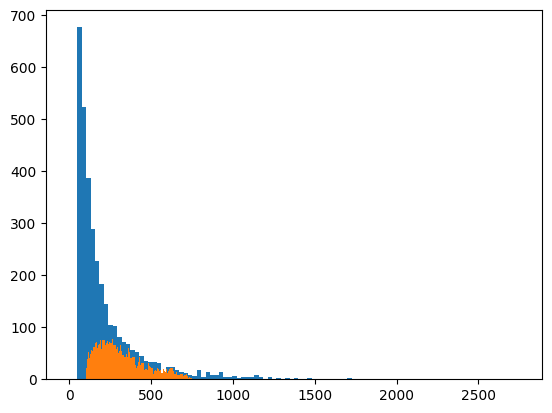

In [5]:
def cuts_for_fi3(fi,run):
    ret_list = []
    zenith = fi['zenith']
    df = zenith.arrays(library = 'pd')
    cos_zen = fi['cos_zen'].arrays(library = 'pd')
    run_ids = fi['pseudo_runid'].arrays(library = 'pd')
    logb0 = fi['logbeta0'].arrays(library = 'pd')
    Slens = fi['Slen'].arrays(library = 'pd')
    liks = fi['jlik'].arrays(library = 'pd')
    ntype = fi['neutrino_type'].arrays(library = 'pd')
    all = pd.concat([df, run_ids, logb0, Slens, liks, ntype, cos_zen], axis=1, join='inner')
    all = all.loc[(all['pseudo_runid']==run) & (all['jlik']>50) & (all['Slen']>100) & (all['logbeta0']<-1.5)\
              & (all['neutrino_type'] == -14)] #& (all['zenith']>90)
            
    l2 = np.array((all['jlik'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['Slen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['logbeta0'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['cos_zen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    #plt.show()
    return len(l2), ret_list
l3, plts3 = cuts_for_fi3(fi3, 10000)

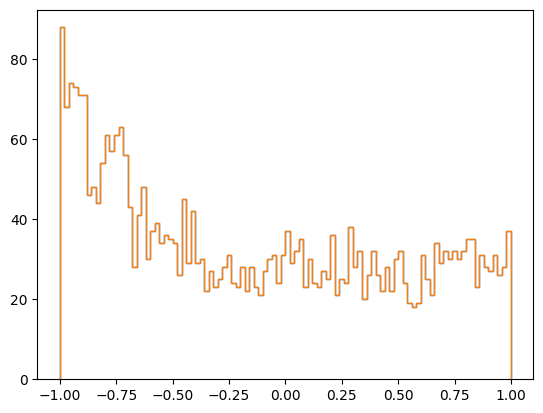

In [6]:
plt.stairs(plts3[3][0], plts3[3][1])
plt.stairs(plts1[3][0], plts1[3][1])
#plts3[2][1], plts1[2][1]

3413 3413


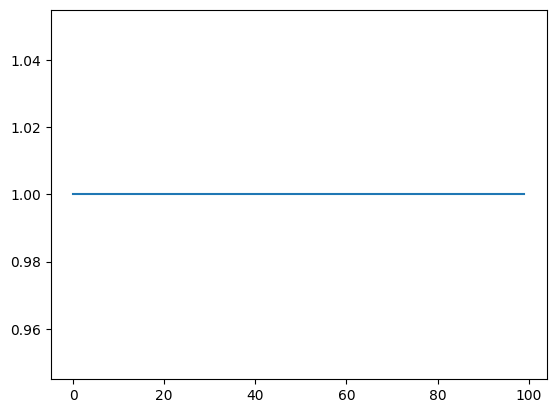

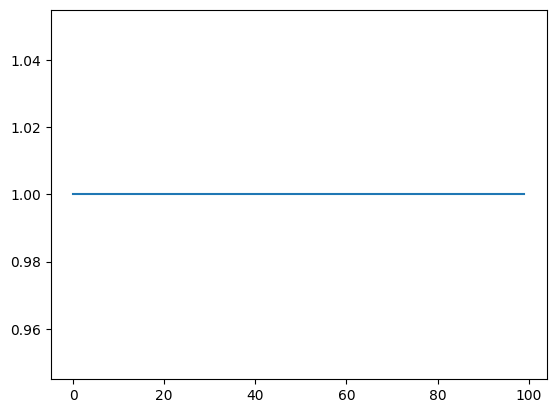

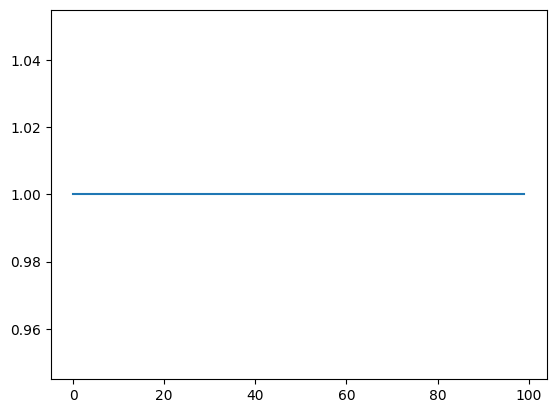

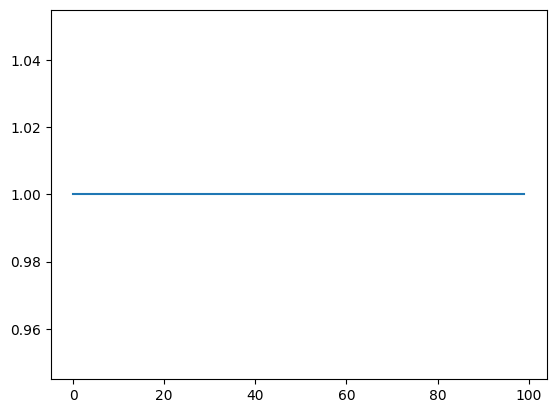

In [7]:
print(l1, l3)
#likelihood
plt.plot([plts3[0][0][i] / j if j!=0 else 0 if plts3[0][0][i]!=0 else 1 for i, j in enumerate(plts1[0][0])])
plt.show()
#length
plt.plot([plts3[1][0][i] / j if j!=0 else 0 if plts3[1][0][i]!=0 else 1 for i, j in enumerate(plts1[1][0])])
plt.show()
#logbeta0
plt.plot([plts3[2][0][i] / j if j!=0 else 0 if plts3[2][0][i]!=0 else 1 for i, j in enumerate(plts1[2][0])])
plt.show()
#cos_zen
plt.plot([plts3[3][0][i] / j if j!=0 else 0 if plts3[3][0][i]!=0 else 1 for i, j in enumerate(plts1[3][0])])
plt.show()

/tmp/ipykernel_33859/536893533.py:22: RuntimeWarning: divide by zero encountered in log10
  all = all.loc[(all['run_id'] == run) & (all['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5) & (all['trks.dir.z'].to_numpy()[:, 0] > 0)]


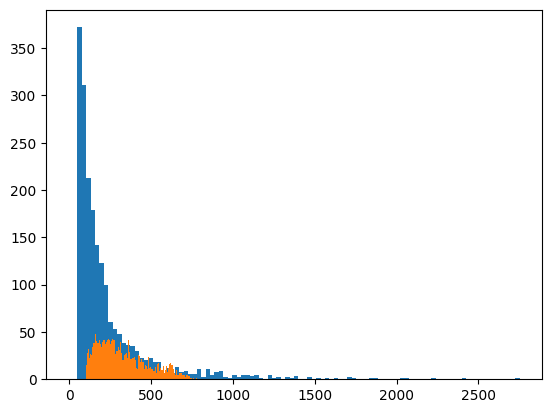

In [81]:
def cuts_for_fi1_wz(fi, run):
    list_ret = []
    run_ids = fi['run_id'].arrays(library = 'pd')
    #zenith = fi['zenith'].arrays(library = 'pd')
    mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
    ids = fi['id'].arrays(library = 'pd')
    lkld = fi['trks.lik']
    df = lkld.arrays(library = 'pd')
    #cos zenith = trackfit.dir.z
    trks_z = fi['trks.dir.z'].arrays(library = 'pd')
   
    #Slength = trackfit.len or trks.len

    fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
    # logbeta0 = betazero/angular resolution???

    #lik_run = pd.concat([df, run_ids], axis=1, join='inner')
    all = pd.concat([df, run_ids, ids, trks_z, fitinf], axis = 1, join = 'inner') 
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 else None )))

    all = all.loc[(all['run_id'] == run) & (all['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5) & (all['trks.dir.z'].to_numpy()[:, 0] > 0)]
    
    #temp = lik_run.loc[(lik_run['run_id'] == run) & (lik_run['trks.lik'].to_numpy()[:, 0] > 50)]
    l2 = np.array((all['trks.lik'].tolist()))[:,0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 else None )))
    list_ret += [plt.hist(Slen, 100)]
    list_ret += [plt.hist(np.log10(beta0), 100)]
    l2 = - all['trks.dir.z'].to_numpy()[:, 0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    #plt.show()
    #return len(l2), plt1
    return len(l2), list_ret
l1_wz, plts1_wz = cuts_for_fi1_wz(fi1, 10000)

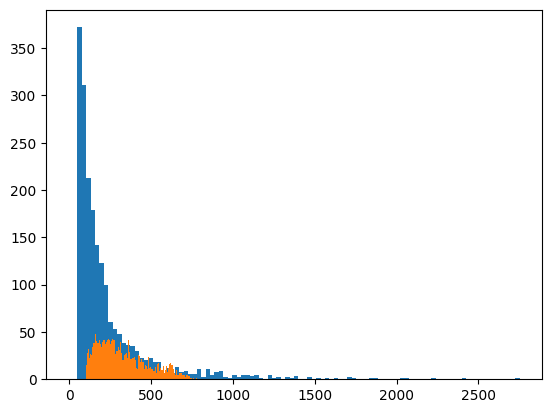

In [84]:
def cuts_for_fi3_wz(fi,run):
    ret_list = []
    zenith = fi['zenith']
    df = zenith.arrays(library = 'pd')
    cos_zen = fi['cos_zen'].arrays(library = 'pd')
    run_ids = fi['pseudo_runid'].arrays(library = 'pd')
    logb0 = fi['logbeta0'].arrays(library = 'pd')
    Slens = fi['Slen'].arrays(library = 'pd')
    liks = fi['jlik'].arrays(library = 'pd')
    ntype = fi['neutrino_type'].arrays(library = 'pd')
    all = pd.concat([df, run_ids, logb0, Slens, liks, ntype, cos_zen], axis=1, join='inner')
    all = all.loc[(all['pseudo_runid']==run) & (all['jlik']>50) & (all['Slen']>100) & (all['logbeta0']<-1.5)\
              & (all['neutrino_type'] == -14) & (all['zenith']>90)]
            
    l2 = np.array((all['jlik'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['Slen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['logbeta0'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['cos_zen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    #plt.show()
    return len(l2), ret_list
l3_wz, plts3_wz = cuts_for_fi3_wz(fi3, 10000)

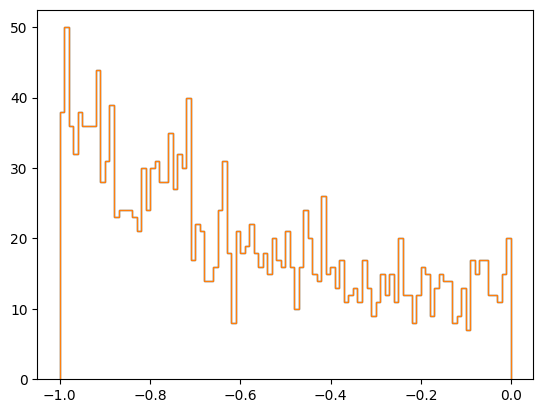

In [87]:
plt.stairs(plts3_wz[3][0], plts3_wz[3][1])
plt.stairs(plts1_wz[3][0], plts1_wz[3][1])

2009 2009


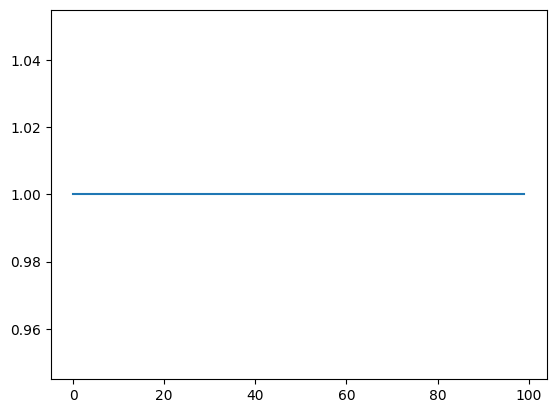

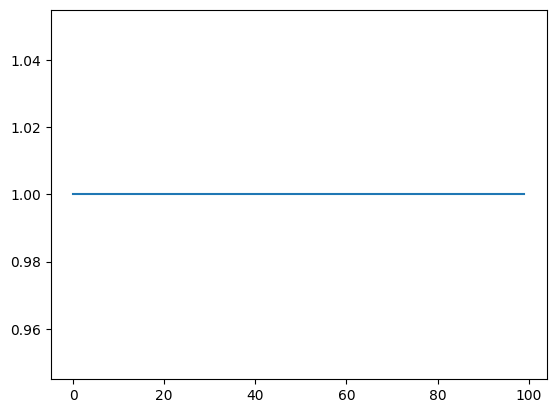

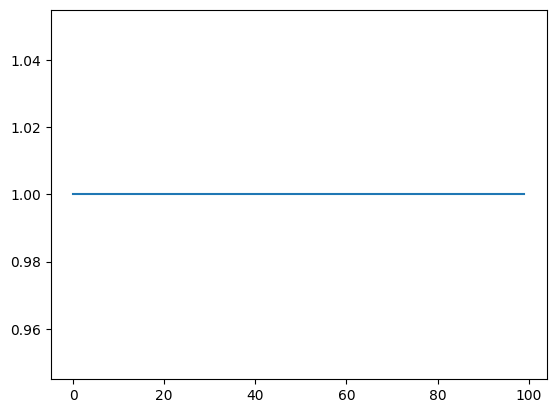

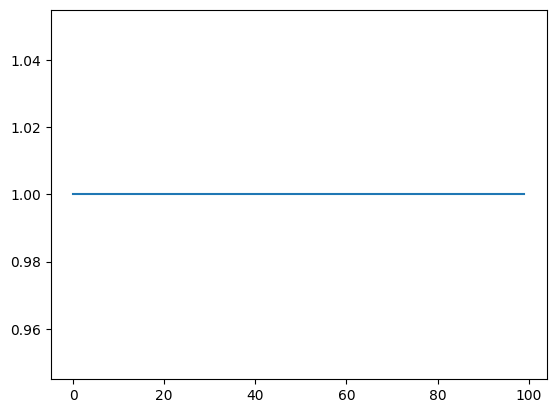

In [102]:
print(l1_wz, l3_wz)
#likelihood
plt.plot([plts3_wz[0][0][i] / j if j!=0 else 0 if plts3_wz[0][0][i]!=0 else 1 for i, j in enumerate(plts1_wz[0][0])])
plt.show()
#length
plt.plot([plts3_wz[1][0][i] / j if j!=0 else 0 if plts3_wz[1][0][i]!=0 else 1 for i, j in enumerate(plts1_wz[1][0])])
plt.show()
#log_beta0
plt.plot([plts3_wz[2][0][i] / j if j!=0 else 0 if plts3_wz[2][0][i]!=0 else 1 for i, j in enumerate(plts1_wz[2][0])])
plt.show()
#cos_zen
plt.plot([plts3_wz[3][0][i] / j if j!=0 else 0 if plts3_wz[3][0][i]!=0 else 1 for i, j in enumerate(plts1_wz[3][0])])
plt.show()

### The same for several runs

In [4]:
csv_name = "runsAllGolden_arca6.csv"
csv_ids = pd.read_csv(csv_name)['id'].tolist()

In [5]:
#np.sort(fi3['pseudo_runid'].arrays(library = 'pd')['pseudo_runid'].unique()) \
fi1_ids = np.sort(fi1['run_id'].arrays(library = 'pd')['run_id'].unique())
fin_ids = [i for i in csv_ids if i in fi1_ids]

In [ ]:
[i for i in np.sort(all['run_id'].unique()) if i not in csv_ids]

zenith	pseudo_runid	logbeta0	Slen	jlik	neutrino_type	cos_zen

In [140]:
rids = all1['run_id'].to_numpy()
jl = all1['trks.lik'].to_numpy()[:, 0]
lgb0 = np.array((all1['trks.fitinf']).apply(lambda x: np.log10((list(x[0]))[0])))
Sln = np.array((all1['trks.fitinf']).apply(lambda x: ((list(x[0]))[10])))
czen = all1['trks.dir.z'].to_numpy()[:, 0]
arr = np.stack((rids, lgb0, Sln, jl, czen), axis = 1)
df1 = (pd.DataFrame(arr, columns=['run_id', 'jlik', 'logbeta0', 'Slen', 'cos_zen']))

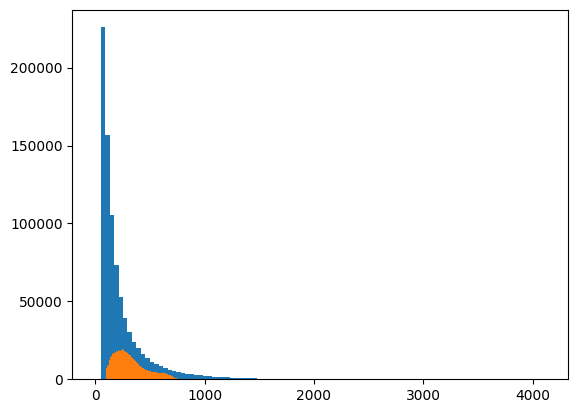

In [19]:
def cuts_for_fi1_wz_csv(fi, run):
    list_ret = []
    run_ids = fi['run_id'].arrays(library = 'pd')
    ids = fi['id'].arrays(library = 'pd') 
    df = fi['trks.lik'].arrays(library = 'pd')
    #cos zenith = - trackfit.dir.z
    trks_z = fi['trks.dir.z'].arrays(library = 'pd')

    #Slength = trackfit.len or trks.len

    fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')


    all = pd.concat([df, run_ids, ids, trks_z, fitinf], axis = 1, join = 'inner') 


    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    Elen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[13] if len(list(x[0]))>= 13 else None ))
    #Slen = np.array(fitinf['trks.fitinf'].apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if (len(list(x[0]))>= 1 and (list(x[0])[0] != 0)) else 1000 if (len(list(x[0]))>= 1) else 1000 )))
    #beta0 = np.array((fitinf['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if (len(list(x[0]))>= 1 and (list(x[0])[0] != 0)) else 1000 if (len(list(x[0]))>= 1) else 1000 )))
    tv = (all['run_id'] == fin_ids[0])
    for run in fin_ids[1:]:
        tv = tv | (all['run_id'] == run)
    #tv = (run_ids['run_id'] == fin_ids[0])
    #for run in fin_ids[1:]:
    #    tv = tv | (run_ids['run_id'] == run)

    tv_beta0 = np.array(all['trks.fitinf'].apply(lambda x: (len(list(x[0]))>= 1)))
    cond = tv & tv_beta0  & (all['trks.lik'].to_numpy()[:, 0] > 50) & (Slen > 100) & (np.log10(beta0) < -1.5) & (Elen > 0) #& (all['trks.dir.z'].to_numpy()[:, 0] > 0)
    all = all.loc[cond]

    #tv_beta0 = np.array(fitinf['trks.fitinf'].apply(lambda x: (len(list(x[0]))>= 1)))
    #cond = tv & tv_beta0 & (df['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5) & (trks_z['trks.dir.z'].to_numpy()[:, 0] > 0)
    

    l2 = np.array((all['trks.lik'].tolist()))[:,0]
    #l2 = np.array((df[cond]['trks.lik'].tolist()))[:,0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]

    list_ret += [plt.hist(Slen[cond], 100)]
    list_ret += [plt.hist(np.log10(beta0[cond]), 100)]
    l2 = - all['trks.dir.z'].to_numpy()[:, 0]
    #l2 = - trks_z[cond]['trks.dir.z'].to_numpy()[:, 0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    #plt.show()
    #return len(l2), plt1
    return len(l2), list_ret, all
l1_wz_csv, plts1_wz_csv, all1 = cuts_for_fi1_wz_csv(fi1, 10000)

In [196]:
rids = all1['run_id'].to_numpy()
jl = all1['trks.lik'].to_numpy()[:, 0]
lgb0 = np.array((all1['trks.fitinf']).apply(lambda x: np.log10((list(x[0]))[0])))
Sln = np.array((all1['trks.fitinf']).apply(lambda x: ((list(x[0]))[10])))
czen = all1['trks.dir.z'].to_numpy()[:, 0]
arr = np.stack((rids, lgb0, Sln, jl, czen), axis = 1)
df1 = (pd.DataFrame(arr, columns=['run_id', 'logbeta0', 'Slen', 'jlik', 'cos_zen']))

In [13]:
min(np.array((all1['trks.fitinf']).apply(lambda x: ((list(x[0]))[4]))))

0.00010181517217181818

[]


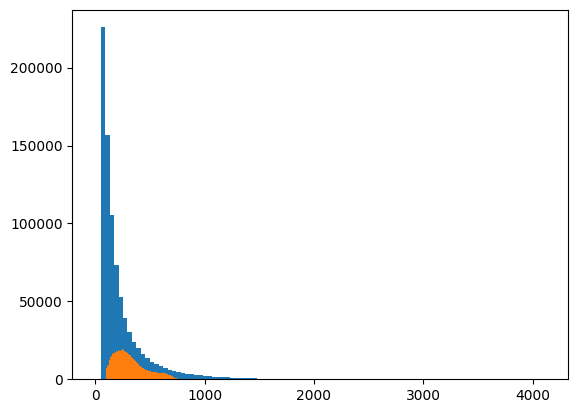

In [20]:
def cuts_for_fi3_wz_csv(fi,run):
    ret_list = []
    zenith = fi['zenith']
    df = zenith.arrays(library = 'pd')
    cos_zen = fi['cos_zen'].arrays(library = 'pd')
    run_ids = fi['pseudo_runid'].arrays(library = 'pd')
    logb0 = fi['logbeta0'].arrays(library = 'pd')
    Slens = fi['Slen'].arrays(library = 'pd')
    liks = fi['jlik'].arrays(library = 'pd')
    ntype = fi['neutrino_type'].arrays(library = 'pd')
    all = pd.concat([df, run_ids, logb0, Slens, liks, ntype, cos_zen], axis=1, join='inner')
    
    mruns = pd.DataFrame()
    for run in fin_ids:
        mruns = pd.concat([mruns, all.loc[(all['pseudo_runid'] == run)]], ignore_index=True)
    
    all = mruns
    all = all.loc[(all['jlik']>50) & (all['Slen']>100) & (all['logbeta0']<-1.5)\
              & (all['neutrino_type'] == -14)] #& (all['zenith']>90)]
    
    print([i for i in np.sort(all['pseudo_runid'].unique()) if i not in csv_ids])
            
    l2 = np.array((all['jlik'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['Slen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['logbeta0'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['cos_zen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    #plt.show()
    return len(l2), ret_list, all
l3_wz_csv, plts3_wz_csv, all3 = cuts_for_fi3_wz_csv(fi3, 10000)
df3 = all3.drop(columns = 'zenith')

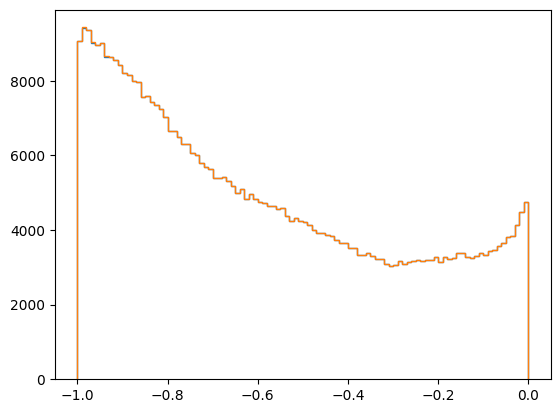

In [37]:
typ = 3
plt.stairs(plts3_wz_csv[typ][0], plts3_wz_csv[typ][1])
plt.stairs(plts1_wz_csv[typ][0], plts1_wz_csv[typ][1])

845741 845741


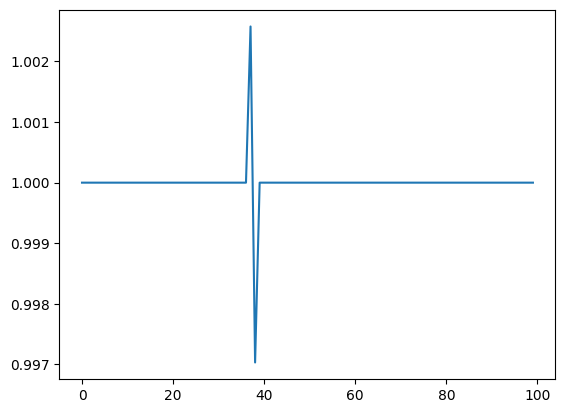

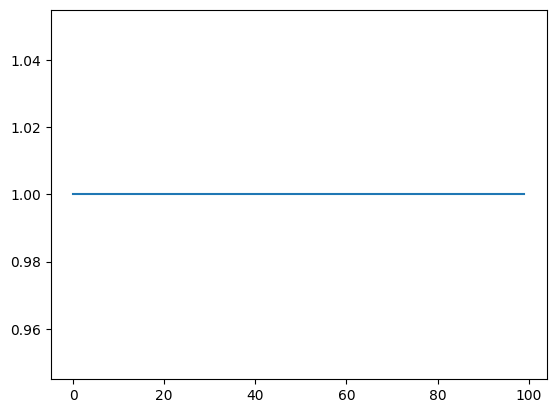

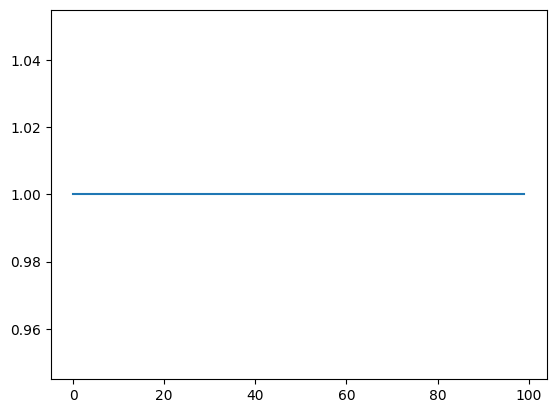

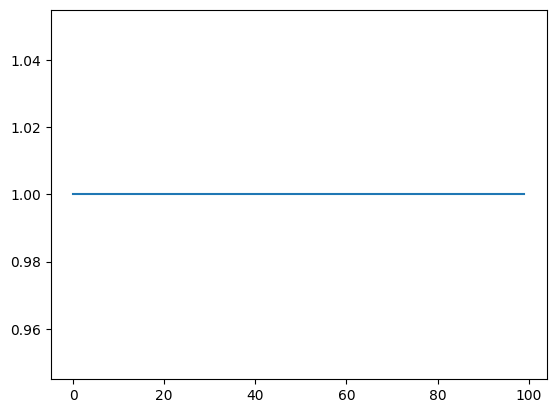

In [95]:
print(l1_wz_csv, l3_wz_csv,)
#likelihood
plt.plot([plts3_wz_csv[0][0][i] / j if j!=0 else 0 if plts3_wz_csv[0][0][i]!=0 else 1 for i, j in enumerate(plts1_wz_csv[0][0])])
plt.show()
#length
plt.plot([plts3_wz_csv[1][0][i] / j if j!=0 else 0 if plts3_wz_csv[1][0][i]!=0 else 1 for i, j in enumerate(plts1_wz_csv[1][0])])
plt.show()
#log_beta0
plt.plot([plts3_wz_csv[2][0][i] / j if j!=0 else 0 if plts3_wz_csv[2][0][i]!=0 else 1 for i, j in enumerate(plts1_wz_csv[2][0])])
plt.show()
#cos_zen
plt.plot([plts3_wz_csv[3][0][i] / j if j!=0 else 0 if plts3_wz_csv[3][0][i]!=0 else 1 for i, j in enumerate(plts1_wz_csv[3][0])])
plt.show()

#### Trying to find the difference in histo ratio

In [127]:
delta3 = (plts3_wz_csv[0][1][37] - plts3_wz_csv[0][1][36])
delta1 = (plts1_wz_csv[0][1][37] - plts1_wz_csv[0][1][36])
plts1_wz_csv[0][1][37] + delta1 / 2, plts3_wz_csv[0][1][37] + delta3 / 2


(1576.177449197258, 1576.1775116920471)

In [109]:
plts3_wz_csv[0][1][38] #- plts1_wz_csv[0][1][37]

1596.5265447235108

In [110]:
condi = (all1['trks.lik'].to_numpy()[:, 0] > 1515) & (all1['trks.lik'].to_numpy()[:, 0] < 1597)

In [111]:
find1 = all1.loc[condi]

In [112]:
condi3 = (all3['jlik']>1515) & (all3['jlik']<1597)
find3 = all3.loc[condi3]

In [155]:
jl1 = find1['trks.lik'].to_numpy()[:, 0]

In [ ]:
jl1r = np.sort([ np.round(i, decimals=4) for i in jl1])
jl1r

In [138]:
f3s = np.sort(find3['jlik'].to_numpy())

In [151]:
np.argmax(f3s - jl1r)

339

In [145]:
f3s[339], jl1r[339]

(1547.5852, 1547.5851)

In [152]:
all3.loc[all3['jlik']==1547.5852]

,zenith,pseudo_runid,logbeta0,Slen,jlik,neutrino_type,cos_zen
2055566,120.925072,9983,-2.721242,357.034332,1547.585205,-14.0,-0.513917


In [157]:
all1.loc[all1['trks.lik'].to_numpy()==1547.585146921188] #id = 3615, pseudo run id = 9983

,trks.lik,run_id,id,trks.dir.z,trks.fitinf
661531,[1547.585146921188 -3513.9264171176837],9983,3615,[0.5139166492962558 0.5268294297527433],"[(0.001900017130497755, 0.0013151371527454513,..."


In [118]:
for j, i in enumerate(find3['jlik'].to_numpy()):
    if i== jl1[0]:
        print(j)

In [120]:
jl1[0]

1556.318627587044

trks.lik[0] -> jlik
- trks.dir.z =  cos( zenith ) 

## Write to a file variables of weird file

In [184]:
all3.loc[(all3['evt_id'] == 540)& (all3['pseudo_runid'] == 9707)]

,evt_id,zenith,pseudo_runid,logbeta0,Slen,jlik,neutrino_type,cos_zen
1126613,540.0,111.115791,9707,-1.674287,185.178741,35.199783,-14.0,-0.360254


In [46]:
run_ids = fi['run_id'].arrays(library = 'pd')
mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
ids = fi['id'].arrays(library = 'pd')
lkld = fi['trks.lik']
df = lkld.arrays(library = 'pd')
trks_z = fi['trks.dir.z'].arrays(library = 'pd')
mc_trks_z = fi['Evt/mc_trks/mc_trks.dir.z'].arrays(library = 'pd')

#Slength = trackfit.len or trks.len
mc_trks_len = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
mc_trksE = fi['trks.pos.z'].arrays(library = 'pd')

# logbeta0 = betazero/angular resolution???

#lik_run = pd.concat([df, run_ids], axis=1, join='inner')
all1 = pd.concat([df, ids,  run_ids, trks_z, mc_trks_len, mc_trks_z, mc_trksE], axis = 1, join = 'inner') 
re = all1.loc[(all1['run_id'] == 10000) &  (all1['id'] == 580)]


In [57]:
list(re['trks.dir.z'][997001])
re

,trks.lik,id,run_id,trks.dir.z,trks.fitinf,mc_trks.dir.z,trks.pos.z
997001,[1020.6533115288516 -539.6910836777324],580,10000,[0.9524936794035431 0.8551642512214973],"[(0.0013905212302035674, 0.0009827367488725067...",[0.952189864590764 0.9521852937921469],[-35.01432167236567 609.1560942250183]


In [64]:
ind = re.index[re['id'] == 580][0]

In [75]:
r_id = re['run_id'][ind]
id = re['id'][ind]
cosz = - list(re['trks.dir.z'][ind])[0]
lik = re['trks.lik'][ind][0]
Slen = list(re['trks.fitinf'][ind][0])[10]
logbz = np.log10(list(re['trks.fitinf'][ind][0])[0])

In [123]:
def wrtof(keys):
    wr = open('test_py', 'a')
    for k in keys:
#k = (10000, 580)
        txt = ''
        run_ids = fi['run_id'].arrays(library = 'pd')
        #mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
        ids = fi['id'].arrays(library = 'pd')
        lkld = fi['trks.lik']
        df = lkld.arrays(library = 'pd')
        trks_z = fi['trks.dir.z'].arrays(library = 'pd')

        fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
        #mc_trksE = fi['trks.pos.z'].arrays(library = 'pd')

        # logbeta0 = betazero/angular resolution???

        #lik_run = pd.concat([df, run_ids], axis=1, join='inner')
        all1 = pd.concat([df, ids,  run_ids, trks_z, mc_trks_z, fitinf], axis = 1, join = 'inner') 
        re = all1.loc[(all1['run_id'] == k[0]) &  (all1['id'] == k[1])]
        ind = re.index[re['id'] == k[1]][0]
        r_id = re['run_id'][ind]
        id = re['id'][ind]
        cosz = - list(re['trks.dir.z'][ind])[0]
        lik = re['trks.lik'][ind][0]
        Slen = list(re['trks.fitinf'][ind][0])[10]
        logbz = np.log10(list(re['trks.fitinf'][ind][0])[0])
        txt = str(id) + ' ' + str(r_id) + ' ' + str(cosz) + ' ' +str(lik) + ' ' + str(Slen) + ' ' + str(logbz) + '\n'
        wr.write(txt)
    wr.close()
    return

In [175]:
k = (9707, 530)
run_ids = fi['run_id'].arrays(library = 'pd')
#mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
ids = fi['id'].arrays(library = 'pd')
lkld = fi['trks.lik']
df = lkld.arrays(library = 'pd')
trks_z = fi['trks.dir.z'].arrays(library = 'pd')

#fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
#mc_trksE = fi['trks.pos.z'].arrays(library = 'pd')

# logbeta0 = betazero/angular resolution???

#lik_run = pd.concat([df, run_ids], axis=1, join='inner')
all1 = pd.concat([df,  ids, run_ids, trks_z], axis = 1, join = 'inner') 
re = all1.loc[(all1['run_id'] == k[0]) &  (all1['id'] == k[1])]

In [176]:
re

,trks.lik,id,run_id,trks.dir.z
195421,[448.9620246572724 -637.8207382103712],530,9707,[-0.12772291878897196 -0.2028816975473104]


In [185]:
#keys = [(10000, 580), (10000, 586), (10000, 430), (10000, 692)]
#keys = [(9707, 510), (9707, 520), (9707, 530), (9707, 540)]
keys = [(9707, 540)]
wrtof(keys)

In [125]:
wr.close()